In [37]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("fake_job_postings.csv")

<h3>Exploratory Data Analysis</h3>

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [40]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


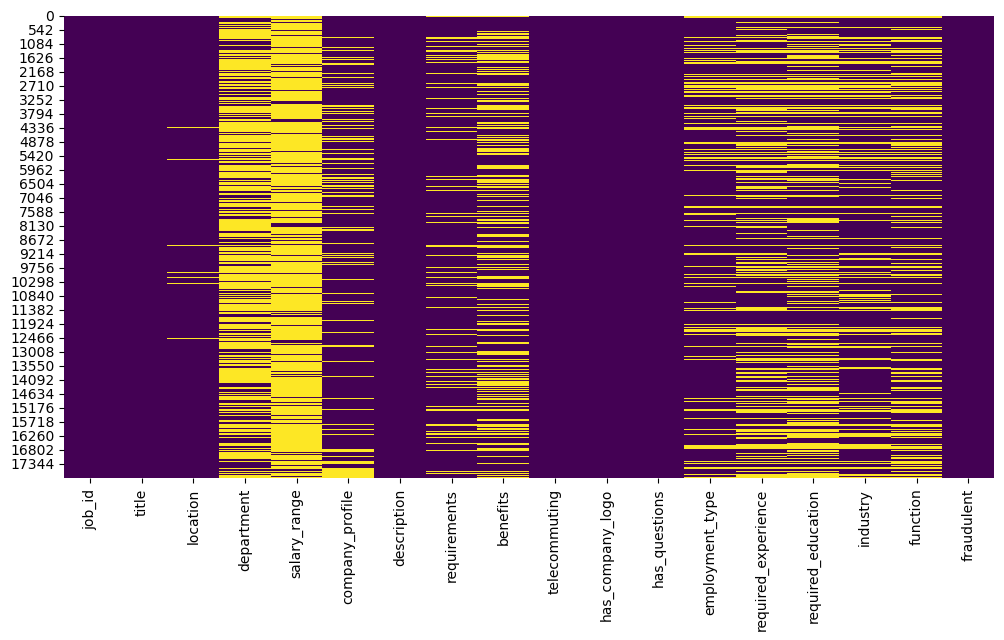

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.show()

In [42]:
print(data['fraudulent'].value_counts(normalize=True))

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64


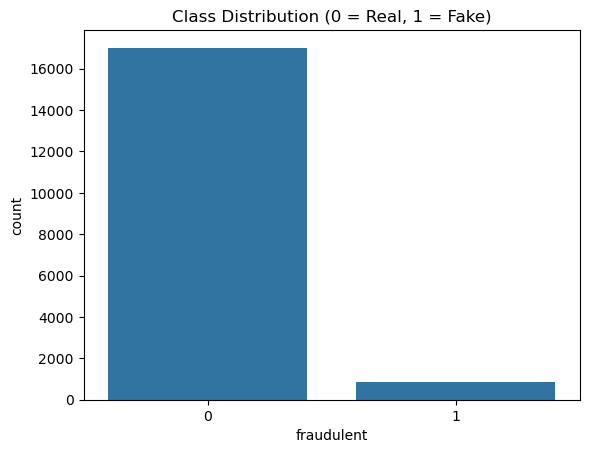

In [43]:
# Distribution of target variable, dataset class imbalance detected
sns.countplot(x='fraudulent', data=data)
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.show()

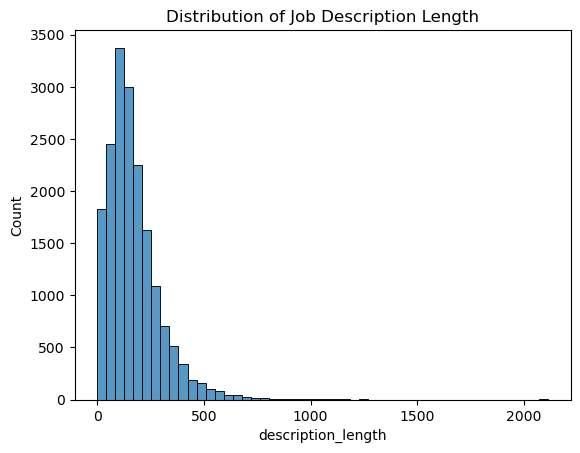

In [44]:
# Text length identification, some outliers detected
data['description_length'] = data['description'].fillna("").apply(lambda x: len(x.split()))
sns.histplot(data['description_length'], bins=50)
plt.title("Distribution of Job Description Length")
plt.show()

In [45]:
data[data['description_length']<1000] 

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,description_length
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,124
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,315
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,50
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,346
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,226
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,161
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,171
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,77


In [46]:
# Removing anything with more than 800 words seem like an easy quick outlier removal method here
# Bias will be introduced, something to address and/or improve in the future
data = data[data['description_length']<800]

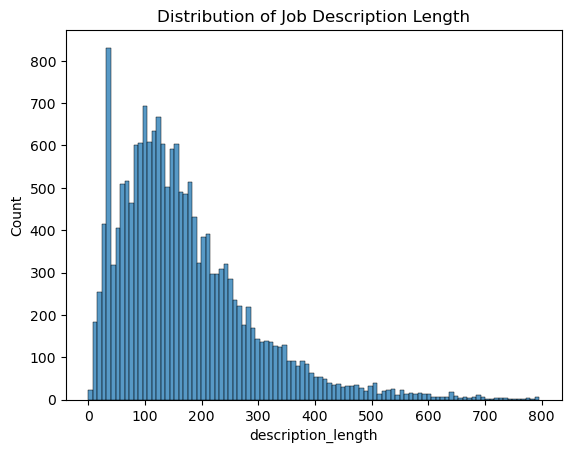

In [47]:
sns.histplot(data['description_length'], bins=100)
plt.title("Distribution of Job Description Length")
plt.show()

In [48]:
# Some null values detected, keeping here for now since we may not need to remove them at all
# Null values may also indicate further parsing to be done
print("Count Null value")
for i in data.columns:
    print(i)
    print(data[i].isnull().sum())

Count Null value
job_id
0
title
0
location
345
department
11512
salary_range
14975
company_profile
3287
description
1
requirements
2668
benefits
7177
telecommuting
0
has_company_logo
0
has_questions
0
employment_type
3452
required_experience
7027
required_education
8073
industry
4883
function
6432
fraudulent
0
description_length
0


In [49]:
# Column we are interested in is 'description', and the classification of fraudulent posting
data = data[data['description'].notna()]

In [50]:
print("Count Null value")
for i in data.columns:
    print(i)
    print(data[i].isnull().sum())

Count Null value
job_id
0
title
0
location
345
department
11511
salary_range
14974
company_profile
3286
description
0
requirements
2667
benefits
7176
telecommuting
0
has_company_logo
0
has_questions
0
employment_type
3451
required_experience
7026
required_education
8072
industry
4882
function
6431
fraudulent
0
description_length
0


<Axes: >

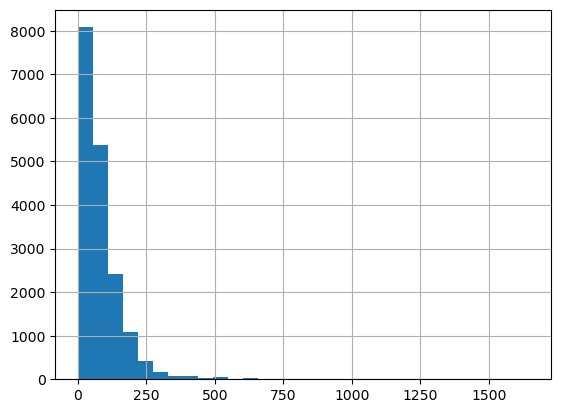

In [51]:
data["req_len"] = data["requirements"].fillna("").apply(lambda x: len(x.split()))
data["req_len"].hist(bins=30)

In [52]:
print(data["req_len"].describe())
data.groupby("fraudulent")["req_len"].describe()

count    17837.000000
mean        78.151427
std         81.659906
min          0.000000
25%         19.000000
50%         62.000000
75%        108.000000
max       1645.000000
Name: req_len, dtype: float64


,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
0,16974.0,79.160068,81.932423,0.0,20.0,63.0,109.0,1645.0
1,863.0,58.312862,73.377054,0.0,7.0,34.0,83.5,471.0


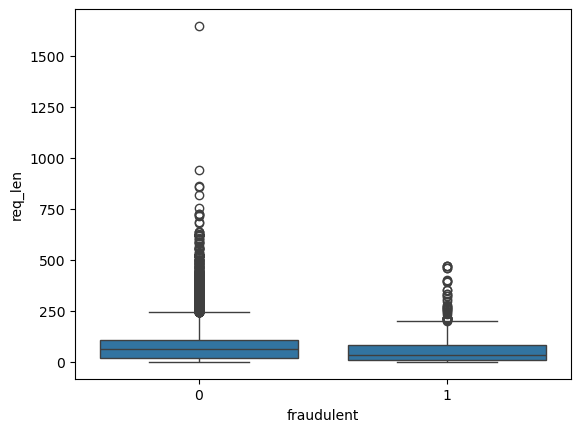

In [53]:
sns.boxplot(x="fraudulent", y="req_len", data=data)
plt.show()
# More outliers detected, this time in 'fraudulent' but there's no definite way to determine whether outliers don't matter
# Thus not removed

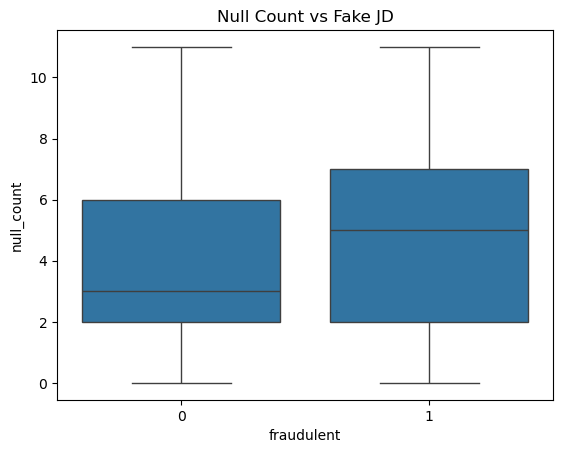

In [54]:
# Another uncertainty, this time with null values of 'fraudulent' column. Keeping them
data["null_count"] = data.isnull().sum(axis=1)

sns.boxplot(x="fraudulent", y="null_count", data=data)
plt.title("Null Count vs Fake JD")
plt.show()

In [55]:
data['required_experience'].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

<h3>Data cleaning using stopwords and ReGex</h3>

In [56]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabianwangsawijaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
print("Current dataset size:", data.shape)

Current dataset size: (17837, 21)


In [58]:
# Further cleaning

def clean_text_comprehensive(text):
    if pd.isna(text):
        return ""
    text = str(text)
    # Remove URLs and HTML
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    # Remove URL-related patterns
    text = re.sub(r'\b\w*url\w*\b', '', text, flags=re.IGNORECASE)
    text = re.sub(r'#\w+#', '', text)
    text = re.sub(r'#URL_\w+#', '', text)
    text = re.sub(r'#', '', text)
    # Word separation for smushed words
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    text = re.sub(r'([A-Z])([A-Z][a-z])', r'\1 \2', text)
    
    # Standardize to lower case & replaced all punctuations and symbols into spaces
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers and special characters, also stop words and cleaned white spaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = " ".join([w for w in text.split() if w not in stop_words])
    text = ' '.join(text.split())

    return text.strip()

In [59]:
# Apply cleaning & tidy up dataset
data['description_clean'] = data['description'].apply(clean_text_comprehensive)
data = data[data['description_clean'].str.len() > 0]
print(f"Final dataset: {data.shape}")
data["null_count"] = data.isnull().sum(axis=1)
data["req_len"] = data["requirements"].fillna("").apply(lambda x: len(x.split()))

print("Data cleaning completed!")

Final dataset: (17836, 22)
Data cleaning completed!


In [116]:
# Save cleaned dataset
data.to_csv("full_cleaned_data.csv", index=False)
print("Saved full cleaned dataset to 'full_cleaned_data.csv'")

Saved full cleaned dataset to 'full_cleaned_data.csv'


<h2>Entering BERT preparation, embedding process</h2>

In [120]:
# Batch run BERT to prevent crashing, otherwise crashes (laptop is basic spec)
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from tqdm import tqdm  # for progress bar

def get_bert_embeddings_batched(texts, batch_size=100, max_length=128, device='cpu'):
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = BertModel.from_pretrained("bert-base-uncased").to(device)
    model.eval()
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        
        # Tokenize batch
        tokens = tokenizer(
            batch_texts,
            max_length=max_length,
            truncation=True,
            padding=True,
            return_tensors="pt"
        ).to(device)

        # Get model outputs
        with torch.no_grad():
            outputs = model(**tokens)
            # Use [CLS] token representation
            batch_embeddings = outputs.last_hidden_state[:, 0, :]  # (batch_size, 768)
            embeddings.append(batch_embeddings.cpu().numpy())

    # Concatenate all batches
    return np.vstack(embeddings)

In [122]:
X_bert = get_bert_embeddings_batched(
    data['description_clean'].fillna("").tolist(),
    batch_size=100  # should be safe for Macbook M1 standard spec
)

100%|█████████████████████████████████████████| 179/179 [10:46<00:00,  3.61s/it]


In [124]:
# Check dimensions and output of X_bert
print(type(X_bert))
print(X_bert.shape)
print(X_bert[0][:10])

<class 'numpy.ndarray'>
(17836, 768)
[ 0.09884612  0.30773115  0.3121631  -0.08504608  0.02687763 -0.30046752
  0.28499076  0.29472786 -0.41773465 -0.28451055]


In [126]:
# Save X_bert so I don't have to re-run
np.save("bert_embeddings.npy", X_bert)
X_bert_loaded = np.load("bert_embeddings.npy")

In [128]:
# Check loaded values
print(type(X_bert_loaded))
print(X_bert_loaded.shape)
print(X_bert_loaded[0][:10])

<class 'numpy.ndarray'>
(17836, 768)
[ 0.09884612  0.30773115  0.3121631  -0.08504608  0.02687763 -0.30046752
  0.28499076  0.29472786 -0.41773465 -0.28451055]


In [113]:
# Continue next file to fine-tune BERT model

<h3>Outdated, don't run this bit unless your computer can handle it (no batching method)</h3>

In [ ]:
# DONT RUN THIS unless you know your laptop can handle it. This runs BERT in one-go, very heavy
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

tokens = tokenizer(
    data['description_clean'].tolist(),
    max_length=128,
    truncation=True,
    padding=True,
    return_tensors="pt"
)

with torch.no_grad():
    outputs = bert_model(**tokens)
    X_bert = outputs.last_hidden_state[:,0,:].numpy()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]